<a href="https://colab.research.google.com/github/BartoszJanJerzy/M-L-Bootcamp-cz.1/blob/master/Case_2_rozpoznawanie_obraz%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set(font_scale=1.3)

#Załądowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

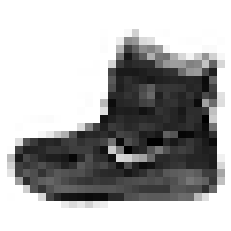

In [4]:
# przykładowy obraz
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

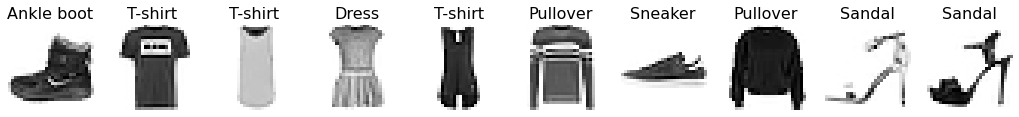

In [6]:
class_names = ['T-shirt','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(18,13))
for i in range(1, 11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='Greys')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)

plt.show()

#Przygotowanie danych

In [7]:
# standaryzacja

X_train = X_train / 255
X_test = X_test / 255

In [10]:
# wypłaszczenie danych z 3D na 2D

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

#Budowa modelu

In [11]:
from sklearn.svm import SVC

cls = SVC()
cls.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = cls.predict(X_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

#Ocena modelu

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8828

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[857,   0,  16,  28,   3,   2,  85,   0,   9,   0],
       [  4, 962,   2,  25,   3,   0,   4,   0,   0,   0],
       [ 11,   2, 816,  16,  88,   0,  65,   0,   2,   0],
       [ 27,   3,  11, 890,  33,   0,  32,   0,   4,   0],
       [  1,   1,  87,  32, 815,   0,  61,   0,   3,   0],
       [  0,   0,   0,   1,   0, 951,   0,  33,   1,  14],
       [135,   1, 104,  27,  68,   0, 654,   0,  11,   0],
       [  0,   0,   0,   0,   0,  21,   0, 955,   0,  24],
       [  3,   1,   1,   5,   2,   2,   4,   5, 977,   0],
       [  0,   0,   0,   0,   0,  11,   1,  37,   0, 951]])

In [19]:
import plotly.figure_factory as ff

columns = ['pred_' + str(i) for i in class_names]
index = ['true_' + str(i) for i in class_names]

def plot_cm(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=1500, height=500, title='Confusion Matrix', font_size=16)
  fig.show()

plot_cm(cm)

In [20]:
results = pd.DataFrame(data={'y_pred':y_pred, 'y_test':y_test})
errors = results[results.y_pred != results.y_test]
errors_idxs = list(errors.index)
errors_idxs[:10]

[12, 17, 23, 25, 40, 42, 49, 51, 66, 67]

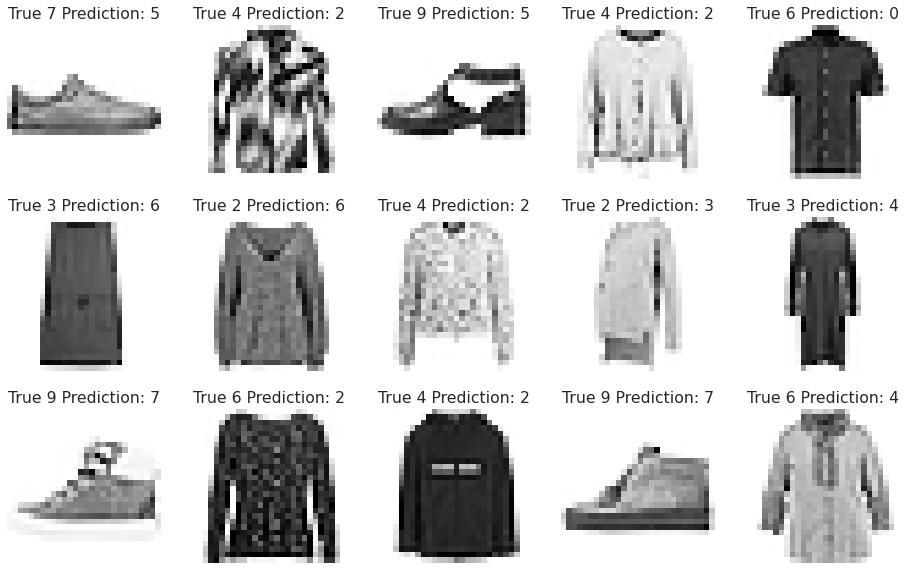

In [22]:
plt.figure(figsize=(16,10))
for idx, error_idx in enumerate(errors_idxs[:15]): #wybór przykąłdowych 15 pomyłek
  image = X_test[error_idx].reshape(28,28) # wyświeteleni obrazu - potrzeba zmienić kształt
  plt.subplot(3,5, idx + 1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f'True {results.loc[error_idx, "y_test"]} Prediction: {results.loc[error_idx, "y_pred"]}')
